# Практична робота №3
### Студентки групи МІТ-31 (підгрупа 2)
### Булгакової Анни

Завдання для практичної роботи з регресії:

**Завдання: Прогнозування ціни житла**

Ваше завдання - побудувати модель регресії для прогнозування ціни житла на основі реально згенерованих даних.

**Крок 1: Генерація даних**

1. Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

2. Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

3. Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

4. Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: `ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка`, де похибка - це випадковий шум.

**Крок 2: Розділення даних**

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

**Крок 3: Побудова моделі регресії**

1. Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

2. Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

**Крок 4: Оцінка моделі**

1. Використайте модель для зроблення прогнозів на тестовому наборі.

2. Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

**Крок 5: Візуалізація результатів**

1. Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

2. Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

**Крок 6: Висновки**

Напишіть короткий звіт, де ви розповідаєте про якість моделі та її здатність прогнозувати ціну житла на основі введених ознак.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
np.random.seed(0)
n_samples = 1000
data={'Housing Area': np.random.randint(50, 201, size=n_samples),
      'Bedrooms': np.random.randint(1, 6, size=n_samples),
      'City Center': np.random.randint(1, 21, size=n_samples)}

noise = np.random.normal(0, 5, n_samples)

data['Price_target'] = 10 * data['Housing Area'] + 5 * data['Bedrooms'] - 2 * data['City Center'] + noise

df = pd.DataFrame(data)
df.to_csv('Data.csv', index=False)

In [21]:
data = pd.read_csv('Data.csv')
data

,Housing Area,Bedrooms,City Center,Price_target
0,97,4,9,966.298413
1,167,4,16,1642.279378
2,117,4,7,1166.728996
3,153,1,11,1511.709719
4,59,1,2,589.587290
...,...,...,...,...
995,184,1,8,1825.166767
996,82,5,5,829.849655
997,131,5,19,1296.801540
998,169,5,16,1684.135077


In [22]:
data.describe()

,Housing Area,Bedrooms,City Center,Price_target
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,127.743000,3.032000,10.613000,1271.310788
std,43.476536,1.398188,5.553744,435.773532
min,50.000000,1.000000,1.000000,468.019411
25%,89.000000,2.000000,6.000000,879.586598
50%,132.000000,3.000000,11.000000,1309.130018
75%,165.000000,4.000000,15.000000,1648.817136
max,200.000000,5.000000,20.000000,2017.813890


In [23]:
X = data.drop('Price_target', axis=1)
y = data['Price_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" MSE = {mse:.2f}, R^2 = {r2:.2f}")

 MSE = 26.66, R^2 = 1.00


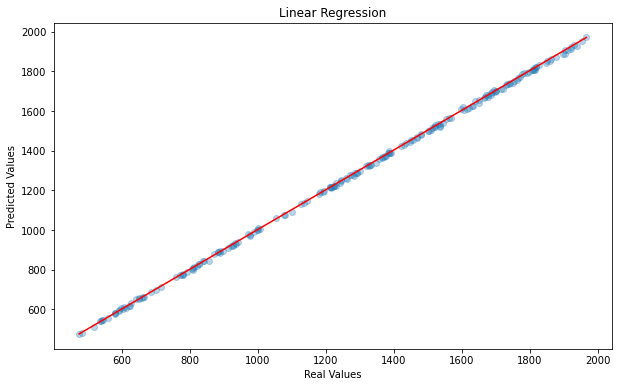

In [27]:
plt.figure(figsize=(10, 6))
plt.title("Linear Regression")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, y_pred, alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], c ='red')

plt.show()

За результатами метрик, можна сказати, що ця модель прогнозує досить добре.
MSE (Mean Squared Error) дорівнює 26.66, що вказує на середню квадратичну помилку моделі. Чим нижче значення MSE, тим краща модель, і в даному випадку, вона є досить точною.
R^2 (R-squared) дорівнює 1.00. R^2 визначає, наскільки добре модель пояснює варіацію в цільовій змінній. Значення 1.00 вказує на ідеальний підгон, де модель повністю пояснює зміну в ціновій мітці на основі ознак.
Значення MSE і R^2 показують, що модель має високу точність та добре пояснює зміну в ціновій мітці.
На графіку можна побачити, що модель не перенавчена та досить добре справляється з прогнозуванням
Отже, дана модель є якісною та точною з точки зору прогнозування ціни житла на основі наданих ознак.